In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

import matplotlib.pyplot as plt

In [2]:
url="https://data.montreal.ca/dataset/9797a946-9da8-41ec-8815-f6b276dec7e9/resource/e18bfd07-edc8-4ce8-8a5a-3b617662a794/download/limites-administratives-agglomeration.geojson"
gdf = gpd.read_file(url)

In [3]:
gdf.columns = gdf.columns.str.lower()

<Axes: >

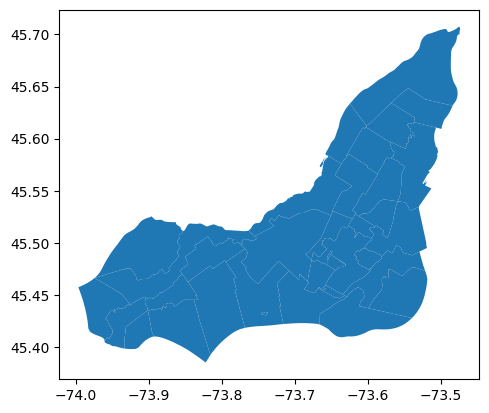

In [4]:
gdf.geometry.plot()

In [7]:
polygons = gdf.copy()

# Create an empty adjacency matrix
n = len(polygons)
adj_matrix = np.zeros((n, n))

# Loop through each polygon and find its neighbors
for i in range(n):
    for j in range(n):
        if i != j:
            if polygons.geometry[i].touches(polygons.geometry[j]):
                adj_matrix[i][j] = 1
                
print(adj_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


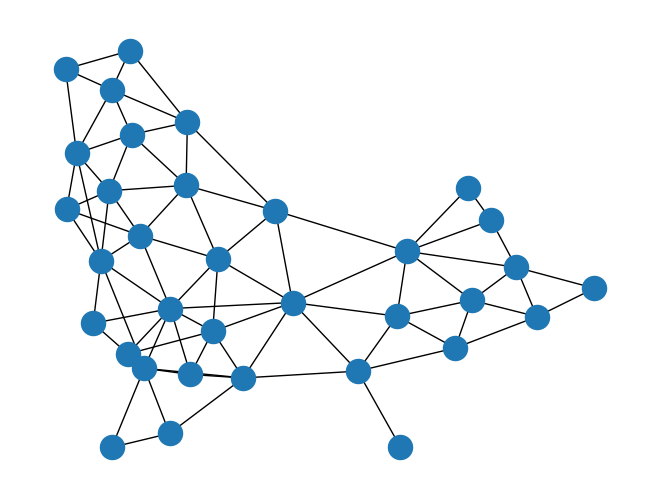

In [9]:
import networkx as nx

G = nx.Graph(np.array(adj_matrix)) 
nx.draw(G)
plt.show()